In [1]:
import neural_net_without_autograd as NNC
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


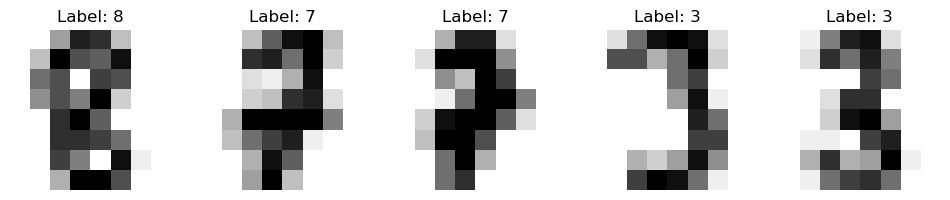

In [2]:
# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2)

network_input_size = X_train.shape[1]
layer_output_sizes = [50, 10]
activations = ['sigmoid', 'softmax']

nn = NNC.NeuralNet(network_input_size, 
                layer_output_sizes, 
                activations, 
                loss_fn='cross_entropy', 
                epsilon=0.01, 
                epochs=100, 
                batch_size=16)
nn.fit(X_train, y_train)

predictions_train = nn.predict(X_train)
predictions_test = nn.predict(X_test)
print(f'Train accuracy: {accuracy_score(y_train, predictions_train)}')
print(f'Test accuracy: {accuracy_score(y_test, predictions_test)}')

print(nn.score(X_test, y_test))

Epoch 0: Accuracy = 0.6283924843423799
Train accuracy: 0.9979123173277662
Test accuracy: 0.9416666666666667
0.9416666666666667
